In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sktime.datasets import load_airline

# Reproducibility
np.random.seed(42)

y = load_airline()
y.name = "Passengers"



ModuleNotFoundError: No module named 'sktime'

In [2]:
y_log = np.log(y)
y_diff = y_log.diff().dropna()

fig = px.line(y_diff, title="Log-differenced series")
fig.show()


NameError: name 'y' is not defined

NameError: name 'y_diff' is not defined

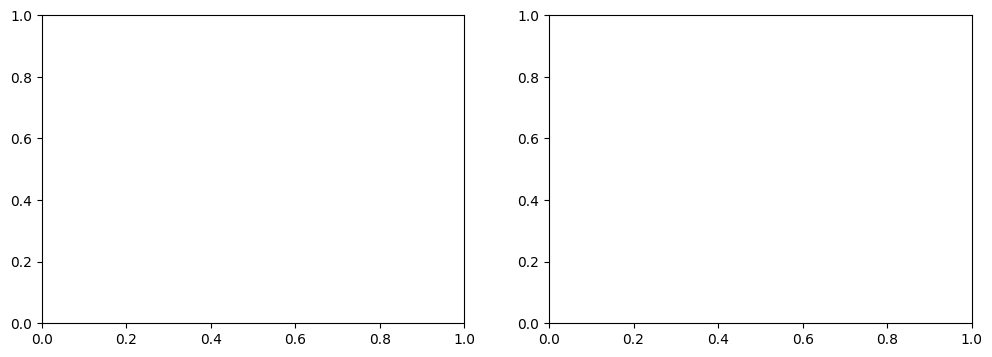

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(y_diff, ax=axes[0], lags=36)
plot_pacf(y_diff, ax=axes[1], lags=36, method="ywm")
plt.tight_layout()


In [4]:
from sktime.forecasting.model_selection import temporal_train_test_split, ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_absolute_error
from sktime.forecasting.arima import AutoARIMA
model = AutoARIMA(sp=12, suppress_warnings=True, stepwise=True)


y_train, y_test = temporal_train_test_split(y, test_size=24)
fh = ForecastingHorizon(y_test.index, is_relative=False)

model.fit(y_train)
pred = model.predict(fh)

mae = mean_absolute_error(y_test, pred)
print(f"MAE: {mae:.3f}")



ModuleNotFoundError: No module named 'sktime'

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_train.index.to_timestamp(), y=y_train, name="Train"))
fig.add_trace(go.Scatter(x=y_test.index.to_timestamp(), y=y_test, name="Test"))
fig.add_trace(go.Scatter(x=pred.index.to_timestamp(), y=pred, name="Forecast"))
fig.update_layout(title="ARIMA forecast vs actual")
fig.show()


NameError: name 'y_train' is not defined

In [6]:
resid = y_test - pred
fig = px.histogram(resid, nbins=30, title="Residual distribution")
fig.show()


NameError: name 'y_test' is not defined